In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib import rc, font_manager
rc("font", family="Malgun Gothic")

In [2]:
regular = pd.read_csv("data/Regular_Season_Batter.csv")
regular.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


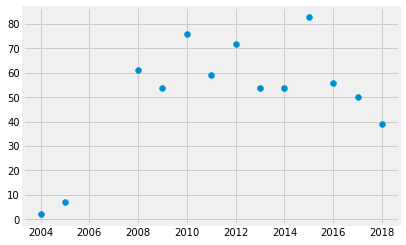

In [4]:
plt.scatter(regular.loc[regular["batter_name"]=="박석민",]["year"], regular.loc[regular["batter_name"]=="박석민",]["BB"])

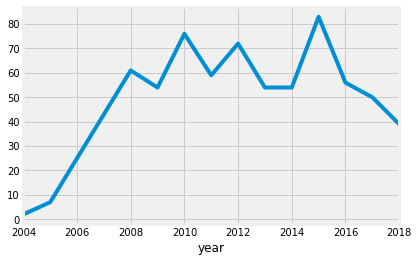

In [8]:
# 위의 방법보다 훨씬 보기 좋음!
regular.loc[regular["batter_name"]=="박석민",].groupby("year")["BB"].mean().plot()

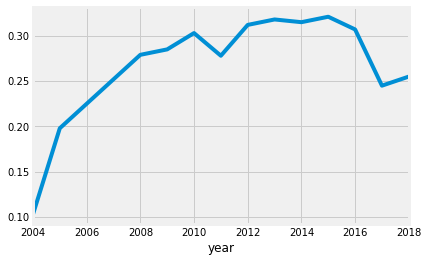

In [9]:
regular.loc[regular["batter_name"]=="박석민",].groupby("year")["avg"].mean().plot()

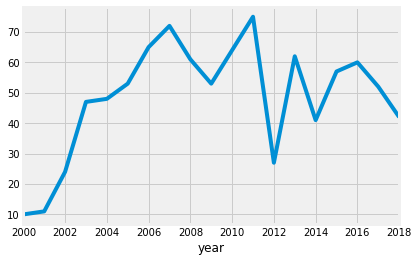

In [11]:
regular.loc[regular["batter_name"]=="이범호",].groupby("year")["BB"].mean().plot()

#### autocorrelation plot

0.424067611906


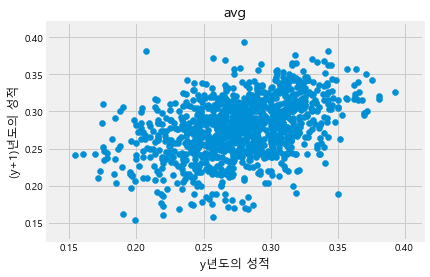

In [27]:
var = "avg"
x = []
y = []
regular1 = regular.loc[regular["AB"] >= 100,]

for name in regular1["batter_name"].unique():
    a = regular1.loc[regular1["batter_name"] == name,]
    k = []
    for i in a["year"].unique():
        if (a["year"] == i+1).sum() > 0:
            k.append(i)
    for i in k:
        x.append(a.loc[a["year"] == i, var].iloc[0])
        y.append(a.loc[a["year"] == i+1, var].iloc[0])
plt.scatter(x, y)
plt.title(var)
plt.xlabel("y년도의 성적")
plt.ylabel("(y+1)년도의 성적")

print(pd.Series(x).corr(pd.Series(y)))

0.596783552209


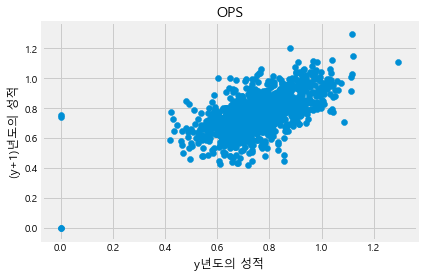

In [26]:
var = "OPS"
x = []
y = []
regular1 = regular.loc[regular["AB"] >= 100,]

for name in regular1["batter_name"].unique():
    a = regular1.loc[regular1["batter_name"] == name,]
    k = []
    for i in a["year"].unique():
        if (a["year"] == i+1).sum() > 0:
            k.append(i)
    for i in k:
        x.append(a.loc[a["year"] == i, var].iloc[0])
        y.append(a.loc[a["year"] == i+1, var].iloc[0])
plt.scatter(x, y)
plt.title(var)
plt.xlabel("y년도의 성적")
plt.ylabel("(y+1)년도의 성적")

print(pd.Series(x).corr(pd.Series(y)))

0.653753167645


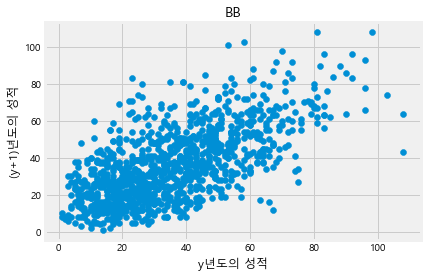

In [25]:
var = "BB"
x = []
y = []
regular1 = regular.loc[regular["AB"] >= 100,]

for name in regular1["batter_name"].unique():
    a = regular1.loc[regular1["batter_name"] == name,]
    k = []
    for i in a["year"].unique():
        if (a["year"] == i+1).sum() > 0:
            k.append(i)
    for i in k:
        x.append(a.loc[a["year"] == i, var].iloc[0])
        y.append(a.loc[a["year"] == i+1, var].iloc[0])
plt.scatter(x, y)
plt.title(var)
plt.xlabel("y년도의 성적")
plt.ylabel("(y+1)년도의 성적")

print(pd.Series(x).corr(pd.Series(y)))

In [30]:
def get_self_corr(var):
    x = []
    y = []
    regular1 = regular.loc[regular["AB"] >= 100,]

    for name in regular1["batter_name"].unique():
        a = regular1.loc[regular1["batter_name"] == name,]
        k = []
        for i in a["year"].unique():
            if (a["year"] == i+1).sum() > 0:
                k.append(i)
        for i in k:
            x.append(a.loc[a["year"] == i, var].iloc[0])
            y.append(a.loc[a["year"] == i+1, var].iloc[0])

    return (pd.Series(x).corr(pd.Series(y)))

In [31]:
get_self_corr("avg")

0.42406761190587672

In [32]:
get_self_corr("OPS")

0.59678355220920531

In [33]:
get_self_corr("BB")

0.65375316764464886

In [34]:
get_self_corr("OBP")

0.54526167300475115

In [35]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [36]:
agg = {}
for i in ['G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E']:
    agg[i] = get_self_corr(i)

In [42]:
agg

{'G': 0.28279452228584218,
 'AB': 0.5345220495165055,
 'R': 0.62262140860435977,
 'H': 0.57804317608337852,
 '2B': 0.51506246165992831,
 '3B': 0.44087969523833109,
 'HR': 0.74125974965366748,
 'TB': 0.63439447218590606,
 'RBI': 0.65194741509779608,
 'SB': 0.72607641961916836,
 'CS': 0.57321437245467555,
 'BB': 0.65375316764464886,
 'HBP': 0.56279172564334712,
 'SO': 0.56640290280166106,
 'GDP': 0.49022241054146531,
 'SLG': 0.61393367810078958,
 'OBP': 0.54526167300475115,
 'E': 0.62255954239693878,
 '1B': 0.53638383420388125}

In [41]:
regular["1B"] = regular["H"] - regular["2B"] - regular["3B"] - regular["HR"]
agg["1B"] = get_self_corr("1B")

신뢰성이 있는 지표 : 홈런, 삼진, 볼넷 (lag_변수들 이용)

신뢰성이 낮은 지표 : 3루타, avg, 1루타 (누적 성적 이용)